<h1><center> Stock Price Forecasting Using ARIMA</center></h1>
<h3><center> Bin Yu, Nuoya Rezsonya, Yejur Singh Kunwar, Iram Bakhtiar</center></h3>

# Contents

1. [Abstract](#Abstract)
2. [Introduction](#Introduction)
3. [Background](#Background)
4. [Methods](#Methods)
5. [Results](#Results)
6. [Conclusion](#Conclusion)
7. [References](#References)
8. [Appendix: Code](#Appendix)

# Abstract

The signals or metrics collected over the time period can be analyzed to predict the patterns found in history. In this case study, we will be examining the structure of a time series by looking at stock prices of The Coca-Cola Company (NYSE:KO), decomposing it to analyze season/trends/residuals, and determining a model to predict future stock prices by developing ARIMA (Auto Regressive Integrated Moving Average) model. Here, we will be establishing some basic metrics to study accuracy of ARIMA model by utilizing diagnostic techniques like loss function and order of differencing.


[Back to Contents](#Contents)

# Introduction

A time series is a series of data points collected in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Therefore it is a sequence of discrete-time data. Examples of time series are stock market forecasting, heights of ocean tides, counts of sunspots, and the daily closing value of the Dow Jones Industrial Average. Time series analysis gives the methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.[1] 

Ever since the stock being invented, the demand of forecasting the future price fluctuation has always been high for investors. The more accurate the prediction is, the more investors can benefit from it. In investing, it is really common to use a time series to trace the price of a security over time. This can be either short term or long term. Autoregressive Integrated Moving Average(ARIMA) model is a popular statistical method for time series prediction. 

In this project, we will be using the The Coco Cola Company (NYSE:KO) stock price from Yahoo starting from Jan 1st 2014 to Jun 1st 2019. ARIMA, Autoregressive Integrated Moving Average is used in this project create a model based on this time series data and then forecast the future stock prices. 

In the followings, we will be discussing the assumptions and parameters of this model, construct and train a ARIMA model, evaluate the performance and at last fit and forecast future stock prices. 

[Back to Contents](#Contents)

# Background

**1. Time Series Decomposition**

Time series data often shows three major patterns: trend, seasonality and cycles. When doing analysis on them, it is very useful to break down the time series data into several components first so that we can understand the time series data better. Trend and cycles are combined together for simplicity, therefore we can look at three components: a trend component(trend), a seasonal component(seasonality), and a remainder component(anything else in the time series).[2] The whole time series analysis begins with the assumption that the data has the combination of these three components:

- **Trend** 

The underlying trend of the data. For example, the stock price has been increasing and it should go a general trend of going up. 

- **Sesonality**

Obvious patterns that repeat with a fixed period of time. For example, Apple website may experience a high volume of visitors after they release new products in September because people are curious and want to check out them. 

- **Residuals**

You can also consider this as “noise” or “irregular”. It is bascially the residuals of the original time series after the seasonalilty and trend are removed.

**2. ARIMA model**

As we have discussed above, ARIMA model is a very popular, simple and powerful model for analyzing and forecasting time series data. 

ARIMA divides up to three parts of analyzing time series data. Every single one of the above three points are used in this model as a parameter which are p, d, and q. That is the reason when we see ARIMA(p,d,q), we will automatically know how this model is using these parameters. They are as followings:

- **Autoregression (AR) or p**

A model that uses the dependent relationship between an observation and some number of lagged observations. It is used to tell ARIMA model the number of lag observations included in the model. For example, if p =3, it means that we need to use three previous periods of the time series in the autoregressive portion of the calculation.[3]


- **Integrated (I) or d**

The use of differencing of raw observations meaning that it needs to subtract an observation from another observation at the previous time point so that we can keep the time series stationary, meaning we make this series without trend and seasonality. The d parameter is used in ARIMA to specify the number of times that the raw observations are difference. 


- **Moving Average (MA) or q**

A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. The q paramter gives the size of the moving average window. 


[Back to Contents](#Contents)

# Methods

#### Stationary Assumption

There is a very important assumption to use ARIMA model, STATIONARY. It is basically meaning that data should be stationary as in no existence of trend in data. Stationarity is a one type of dependence structure just as the independence assumption we have for regression models. We do need this assumption to hold so that we could know our model is consist over the time period and we are confident about the model output at different time points. We can get this assumption proved through visualization or a statistical test. Visualization can be done through decomposition and look at the seasonality plot. Dicky-Fuller test can be used to test out whether the data is not stationary. If this assumption is not met, it is still possible to use ARIMA by subtracting the moving mean and perform Dicky-Fuller on the differenced data again to confirm it is passed. 

#### Parameter Tweaking

There are 8 rules that could help on the parameter tweaking for modelling process through visualizing Autocorrelation and Partial Autocorrelation Functions.[4]

**1. Determining value of d**
    
The d parameter is used in ARIMA to specify the number of times that the raw observations are difference.
    
- Rule 1: If the series has positive autocorrelations out to a high number of lags, then it probably needs a higher order of differencing.

- Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless, then the series does not need a higher order of  differencing. If the lag-1 autocorrelation is -0.5 or more negative, the series may be overdifferenced. But pay attention to overdifferencing.

- Rule 3: The optimal order of differencing is often the order of differencing at which the standard deviation is lowest.

- Rule 4: A model with no orders of differencing assumes that the original series is stationary (mean-reverting). A model with one order of differencing assumes that the original series has a constant average trend (e.g. a random walk or SES-type model, with or without growth). A model with two orders of total differencing assumes that the original series has a time-varying trend.

- Rule 5: A model with no orders of differencing normally includes a constant term (which allows for a non-zero mean value). A model with two orders of total differencing normally does not include a constant term. In a model with one order of total differencing, a constant term should be included if the series has a non-zero average trend.
    
**2. Determining value of p and q**
    
It is to determine the number of lag observations and the size of moving average window included in the model. 
    
Through the Autocorrelation Function, we can tell the relationship between a variable at time t and the same variable at time t-k, and k is a random integer. 
    
Generally speaking, the "partial" correlation between two variables is the amount of correlation between them which is not explained by their mutual correlations with a specified set of other variables. For example, if we have A,B,C as our features and Y as the response variable, the partial correlation between Y and C is the amount of correlation between Y and C that is not explained by their common correlations with A and B. 
    
Through visualizing these two functions, we can clearly find out the location of the sharp cutoffs to determine the value of p and q.
    
- Rule 6: If the PACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e., if the series appears slightly "underdifferenced"--then consider adding an AR term to the model. The lag at which the PACF cuts off is the indicated number of AR terms.

- Rule 7: If the ACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative--i.e., if the series appears slightly "overdifferenced"--then consider adding an MA term to the model. The lag at which the ACF cuts off is the indicated number of MA terms.

- Rule 8: It is possible for an AR term and an MA term to cancel each other's effects, so if a mixed AR-MA model seems to fit the data, also try a model with one fewer AR term and one fewer MA term--particularly if the parameter estimates in the original model require more than 10 iterations to converge. 


#### Error Metric and Performance Evaluation

Based on the model output of time series in Python there are two error metrics that we can use the evaluate the performance: AIC and BIC. This measures the goodness of the fit of the model.

- AIC or the Akaike Information Critera

It is a popular metric in statistical model performance evaluation . It brings insights on the the goodness of fit and the simplicity/parsimony, of the model into a single statistic.[5] We prefer a lower value of AIC when compares two models against each other.

- BIC or Bayesian Information Criterion

Similar to AIC, BIC is an estimate to tell the probability of a model being true using a certain Bayesian setup. Just like AIC, we prefer a lower BIC since a lower value indicate a higher likelyhood of a model being true. 




[Back to Contents](#Contents)

# Results

#### Stationary Assumption: Data Non-Stationary

The decomposition of time series on The Coca-Cola Company (NYSE:KO) shows no obvious seasonality. The Dickey-Fuller test states, a null hypothesis of a time series variable is non-stationary and possesses a unit root. The critical value are calculated at 90%, 95% and 99% confidence level, we fail to reject the null hypothesis at 90% confidence level with a critical value of -2.568 meaning that data is **not stationary**. 




- **1. Original Time Series**
<center><img src='KO_Timeseries.png'></center>
<p><center><b>Figure 1. Original Time Series for Stock KO (The Coco-Cola Company).</b> The data extracted from yahoo finance from 2014-01-01 to 2019-06-01 period. The chart shows an univariate time series of The Coco-Cola Company (KO) stock in a single frame.</center></p>


- **2. Decomposition Visualization**

<center><img src='KO_TimeSeries_Decomposition.png'></center>

<center><b>Figure 2. Time Series Decomposition for Stock KO (The Coco-Cola Company).</b> The group of the four charts shows an univariate time series in a single frame for the plot functions as implemented in the python MatPlotLib package. The top chart is the original univariate time series. The second plot is for the trend. The third charge is the sesonality, and the last plot is the residuals.</center>


- **3. Dickey-Fuller Test Result**

<center><img src="The Coca-Cola Company (NYSE_ KO) Data Rolling Mean & Standard Deviation (Original).png"></center>
<center><b>Figure 3. Original Rolling Mean & Standard Deviation.</b> The critical value are calculated at 90%, 95% and 99% confidence level, we fail to reject the null hypothesis at 90% confidence level with a critical value of -2.568 meaning that data is **not stationary**.</center>

- The Coca-Cola Company (KO) Data Rolling Mean & Standard Deviation (Original) Results of Dickey-Fuller Test:
    - Test Statistic                   -2.394880
    - p-value                           0.143187
    - #Lags Used                        2.000000
    - Number of Observations Used    1973.000000
    - Critical Value (1%)              -3.433669
    - Critical Value (5%)              -2.863006
    - Critical Value (10%)             -2.567550



#### Rolling Mean Substract


<center><img src="The Coca-Cola Company (NYSE_ KO) Data Rolling Mean & Standard Deviation (Substrcted Moving Avg).png"/></center>
<center><b>Figure 4. After Substracting Moving Averages.</b> The p-value decreased, however the absolute value of the test statistics increased but still greater than the absolute value of the critical values, thus rejecting the null hypothesis.</center>

- The Coca-Cola Company (KO) Data Rolling Mean & Standard Deviation (Substrcted Moving Avg) Results of Dickey-Fuller Test:
     - Test Statistic                -1.178911e+01
     - p-value                        9.923615e-22
     - #Lags Used                     1.200000e+01
     - Number of Observations Used    1.952000e+03
     - Critical Value (1%)           -3.433704e+00
     - Critical Value (5%)           -2.863022e+00
     - Critical Value (10%)          -2.567559e+00

<center><img src="The Coca-Cola Company (NYSE_ KO) Data with Rolling Mean Subtracted (Substracted Shift).png"/></center>
<center><b>Figure 5. After Substrcting Shifts.</b> The p-value decreased to 0, however the absolute value of the test statistics increased but still greater than the absolute value of the critical values, thus rejecting the null hypothesis.</center>

- The Coca-Cola Company (KO) Data with Rolling Mean Subtracted (Substracted Shift) Results of Dickey-Fuller Test:
     - Test Statistic                  -32.214142
     - p-value                           0.000000
     - #Lags Used                        1.000000
     - Number of Observations Used    1973.000000
     - Critical Value (1%)              -3.433669
     - Critical Value (5%)              -2.863006
     - Critical Value (10%)             -2.567550


#### Visualization of Autocorrelation and Partial Autocorrelation

<center><img src="KO_acf.png"/></center>
<center><b>Figure 6. Auto Correlation Function.</b> The dotted lines represent the confidence band. The center line represents the mean and the lower and upper grey dotted lines represent the boundaries based off of 95% CI. The graph shows autocorrelation at the first lag is close to 0 or nearly 0. We don’t need to apply a ‘d’ value to our model.</center>

<center><img src="KO_pacf.png"/></center>
<center><b>Figure 7. Partial Auto Correlation Function.</b> The dotted lines represent the confidence band. The center line represents the mean and the lower and upper grey dotted lines represent the boundaries based off of 95% CI.The graph shows autocorrelation at the first lag is close to 0 or nearly 0. We don’t need to apply a ‘d’ value to our model.</center>

Now that our time series has been stationarized by differencing, the next step to take in fitting an ARIMA model is to find out whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series.

We look at the ACF & PACF graphs of the differenced series to see what number of AR (p)/MA(q) are needed. 

We know that ACF describes the autocorrelation between an observation and another observation at a prior time. [6] In the above plot for ACF function,  the dotted lines represent the confidence band. The center line represents the mean and the lower and upper grey dotted lines represent the boundaries based off of 95% CI. The graph shows autocorrelation at the first lag is close to 0 or nearly 0. This obviously shows no integration of data; we have enough differencing and no further differencing is needed. We don’t need to apply a ‘d’ value to our model. It is a stationary model with no long-term trend visible. From lag 1 onwards, there is hardly any linear decay visible. 

We will next look at the PACF plot to ascertain the most relevant lags. The PACF describes the direct relationship between an observation and its lag. The first observation we make is the graph for ACF and PACF look nearly identical and that the PACF plot has a significant spike only at lag 1, this means that all the autocorrelations are effectively explained by the lag-1 autocorrelation.

The PACF graph has a very large spike at lag 1 and no other significant spikes, indicating that in the absence of differencing an AR(1) model should be used. However, the AR(1) term in this model will turn out to be equivalent to a first difference, because the estimated AR(1) coefficient (which is the height of the PACF spike at lag 1) will be almost exactly equal to 1. [7] In other words, if we don't difference it, then we should fit an AR(1) model which will be equivalent to taking a first difference.


#### Parameter Tuning

1. Initial result

The initial plots for residuals of the model at 0 and it appears to be a bit skewed to the left. The Kernel density (KDE) plot curve echoes the same observation. 



<center><img src="KO_residual_Initial.png"/></center>
<center><b>Figure 8. Initial Model Residual Plot.</b> It shows residuals of the model at 0 and it appears to be a bit skewed to the left.</center>

<center><img src="KO_kde_Initial.png"/></center>
<center><b>Figure 9. Initial Model KDE Plot.</b> The KDE curve echoes the same observation as above where we can see model at 0 difference appears left skewed.</center>



2. Parameter tnuning

Using brute force, the best parameters that were uncovered were 3,0,2 for p,d,q with an RSS of 14.4716.
But this violates the 8th rule. Per the 8th rule, as stated previously “Rule 8: It is possible for an AR term and an MA term to cancel each other's effects, so if a mixed AR-MA model seems to fit the data, also try a model with one fewer AR term and one fewer MA term--particularly if the parameter estimates in the original model require more than 10 iterations to converge. BEWARE OF USING MULTIPLE AR TERMS AND MULTIPLE MA TERMS IN THE SAME MODEL.”


3. Best set of parameters (p, d, q)

Keeping in mind the 8th rule violation, we select the next best parameters of 3,0,1 p,d,q with an RSS of 14.5279. This would align with the rules states above. ARIMA does not support seasonal data, and our data shows seasonality. Though we used ARIMA, and erased trending and seasonality from the series, we also employed SARIMA and used grid search to determine the best parameters that’ll produce the best fitting model for the series. From the second method used , the best parameters determined were: Best model ARIMA(0,1,1) x (1,0,0,12) and yelds the lowest  AIC of 1194.5507. For evaluating the model, we will use the AIC (Akaike Information Criterion) value, which is provided by ARIMA models fitted using statsmodels library. The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.[3] The AIC for the best parameters selected for the model using grid search was 1200.353. 

<center><img src="KO_3_0_1.png"/></center>
<center><b>Figure 10. Best p, d, q.</b> We select the next best parameters of 3,0,1 p,d,q with an RSS of 14.5279. This achieves same goodness of fit and respects all of the assumptions for ARIMA stated within 8 rules of estimating p,d,q.</center>


<center><img src="KO_residual_Final.png"/></center>
<center><b>Figure 11. Final Model Residual Plot.</b> The residuals do not seem to violate the assumption of ARIMA.</center>

<center><img src="KO_residual_kde_Final.png"/></center>
<center><b>Figure 12. Final Model KDE Plot.</b> The KDE plot stays same as initial model, showing left skewed at 0 difference.</center>


The p,d, and q are then chosen by minimizing the AICc. The algorithm uses a stepwise search to traverse the model space to select the best model with smallest AICc.
#### Final Model Used

This model is an extension the previous model, and uses 0,1,1 is the best p, d, q paramter. In this model, annual seasonal effect is allowed.The data assumes following process:

<center>Δ𝑦𝑡=𝑐+𝜙1Δ𝑦𝑡−1+𝜃1𝜖𝑡−1+𝜃4𝜖𝑡−4+𝜖𝑡</center>
 
 
We generated 4-plot for this model, and following conclusions based on the above 4-plot.
- The residuals do not violate the assumption of ARIMA. It also shows that most of the residuals are in the range (-1, 1).
- There is no autocorrelation at lag 1 on lag plot.
- It shows normal distribution in histogram and normal probability plot.

Thus, 4-plot of the residuals indicates that the fitted model is adequate for the data. [9]


<center><img src="KO_Diagnostics.png"/></center>
<center><b>Figure 13. Diagnostics Plots.</b>The residuals do not violate the assumption of ARIMA. It also shows that most of the residuals are in the range (-1, 1).There is no autocorrelation at lag 1 on lag plot.It shows normal distribution in histogram and normal probability plot.</center>


<center><img src="KO_Forcast.png"/></center>
<center><b>Figure 14. One Step Ahead Forecast vs. Actual. </b> This plot shows actual trend and one step forecast of predictions based on fitted model. </center>


<center><img src="KO_Forcast_30days.png"/></center>
<center><b>Figure 15. 30-Days Forecast.</b>This plot shows 30 days in future based on fitted model. We do see very large confidence band at alpha = 0.25. This indicates 30 days forecast may be too far out for prediction model to perform well.</center>

- **Error Metrics and Performance Evaluation**

AIC and BIC are both penalized-likelihood criteria. AIC helps quantify the goodness of fit and also the simplicity/parsimony of the model into a simple static. The generally acceptable principal is that when two models are being compared on the basis of the AIC, the model which minimizes AIC is considered better. AIC is an estimate of a constant plus the relative distance between the unknown true likelihood function of the data and the fitted likelihood function of the model, so a lower value for the AIC means a model is considered to be closer to the truth.[8]

The initial model’s AIC was 1200.353 and BIC was 1233.883. The final model selected had an AIC of 1194.550. The final model, with a lower AIC than the initial model, may offer a better fit but that fit may not be worth the loss in parsimony imposed by the addition of two AR lags. BIC is an estimate of a function of the posterior probability of a model being true, under a Bayesian setup, so that a lower BIC means that a model is considered to be more likely to be the true model. The Mean Squared Error of our forecasts is 0.16.The Root Mean Squared Error of our forecasts is 0.4. Here low values are preferred again since this indicates how accuratley our model is performing for prediction.



[Back to Contents](#Contents)

# Conclusion

Conclusively, this case study familiarized us with time series data analysis using ARIMA. Our methods included recognizing trends, seasonality, and residuals present within the dataset after resampling and filling for missing values using pad method (use previous valid observation to fill gap); recognize the stationarity, perform Dickey fuller test for recognizing stationarity. We found our data was not stationary thus, rejecting null hypothesis. This suggested that we could develop model using ARIMA to recognize p,d,q terms in order to perform prediction. Our discussion of results suggest that annual seasonal effect consideration in ARIMA created best goodness of fit resulting in better model. The diagnostic plots statistically indicate that fitted model is adequate for the data used for predicting the Coca-Cola stock prices. However, this model should be used with caution as it may not have larger application for generalization. In order to show this, we also plotted 30 days forecast where confidence band is shown to be very wide, thus indicating caution to bid for stock prices by using this model.

[Back to Contents](#Contents)

# Reference

[1] Time series Wikipedia. Accessed from: https://en.wikipedia.org/wiki/Time_series

[2] Forecasting: Principles and Practice (chapter 6). Accessed from: https://otexts.com/fpp2/decomposition.html

[3] Time series Forecasting — ARIMA models. Accessed from: https://towardsdatascience.com/time-series-forecasting-arima-models-7f221e9eee06

[4] Identifying the order of differencing in an ARIMA model. Accessed from: https://people.duke.edu/~rnau/411arim2.htm

[5] Using AIC to Test ARIMA Models. Accessed from: https://coolstatsblog.com/2013/08/14/using-aic-to-test-arima-models-2/

[6] A Gentle Introduction to Autocorrelation and Partial Autocorrelation. Accessed from: www.machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation

[7] Identifying the numbers of AR or MA terms in an ARIMA model. Accessed from: https://people.duke.edu/~rnau/411arim3.htm

[8] The Methodology Center of PennState College of Health and Human Development. Accessed from:
www.methodology.psu.edu/eresources/ask/sp07 & www.researchgate.net 

[9] Engineering Statistics Handbook. Accessed from https://www.itl.nist.gov/div898/handbook/pmc/section6/pmc624.htm

[Back to Contents](#Contents)

# Appendix




[Back to Contents](#Contents)

## Codes


Load the data and plot it.  Note that to make the index a time object in python, we need to do a conversion
$superscript^2 subscriot_7 x^{n-1}$

In [1]:
# install necessary package if it has not installed yet
#!pip install pandas_datareader

In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
import matplotlib
from matplotlib import pyplot as plt

import datetime
from pandas_datareader import data as web
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import itertools
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
 


In [3]:

# function to test stationarity
def test_stationarity(timeseries,name):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(10,5))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title(name)
    filename = name.replace(':','_') +'.png'
    plt.savefig(filename)
    plt.show()
  
    
    #Perform Dickey-Fuller test:
    print(name,'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

### Import stock data into data frame
[Back to Contents](#Contents)

In [4]:
# import stock data for coco cola (KO)
pd.core.common.is_list_like = pd.api.types.is_list_like
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 6, 1)
# use pandas data reader to get the stock price data from yahoo financial manager
price = web.DataReader('KO', 'yahoo', start, end)["Close"]
price.index = pd.to_datetime(price.index)


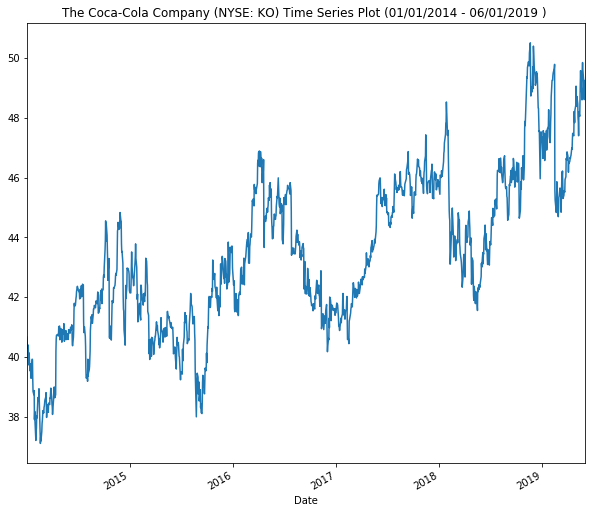

In [5]:
ax = price.plot(title = "The Coca-Cola Company (NYSE: KO) Time Series Plot (01/01/2014 - 06/01/2019 ) ",figsize =(10,9))
fig = ax.get_figure()
fig.savefig("KO_Timeseries.png", ext='png', bbox_inches="tight")


In [6]:
# print out data time 
price.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2019-05-17', '2019-05-20', '2019-05-21', '2019-05-22',
               '2019-05-23', '2019-05-24', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-05-31'],
              dtype='datetime64[ns]', name='Date', length=1362, freq=None)

* There are some gaps in the data set. you can see the data is missing 2014-01-04, 2014-01-05 and it is necessary to do resampling.

### Data Resampling
[Back to Contents](#Contents)

In [7]:
# resampling the data set as there are some gaps in the data set
price = price.resample('D', label='right').mean().fillna(method='pad')

In [8]:
# print out data time after resampling
price.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10',
               '2014-01-11', '2014-01-12',
               ...
               '2019-05-23', '2019-05-24', '2019-05-25', '2019-05-26',
               '2019-05-27', '2019-05-28', '2019-05-29', '2019-05-30',
               '2019-05-31', '2019-06-01'],
              dtype='datetime64[ns]', name='Date', length=1976, freq='D')

* There is no gap after the resampling

### Time Series Decomposition
[Back to Contents](#Contents)

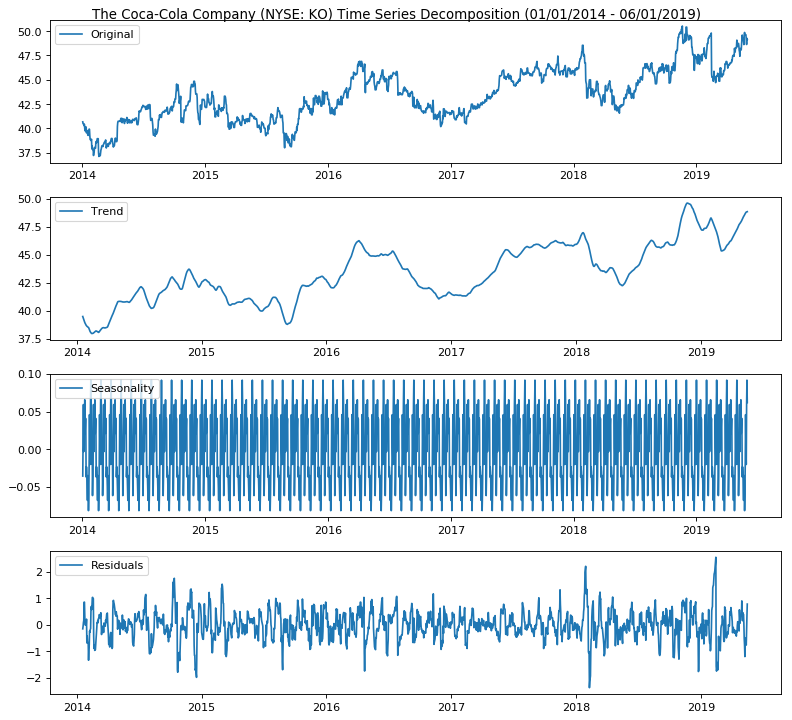

In [9]:
# Decomposition time series
decomposition = seasonal_decompose(price,freq=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(num=None, figsize=(10,9), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(411)
plt.plot(price, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

plt.suptitle("The Coca-Cola Company (NYSE: KO) Time Series Decomposition (01/01/2014 - 06/01/2019)",verticalalignment="baseline", horizontalalignment="center")
plt.savefig("KO_TimeSeries_Decomposition.png", ext='png', bbox_inches="tight")
plt.show()


### Stationarity Testing
[Back to Contents](#Contents)

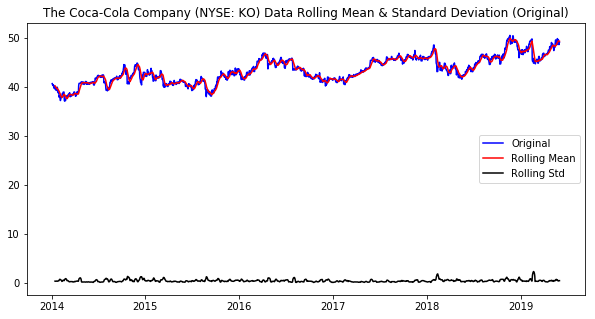

The Coca-Cola Company (NYSE: KO) Data Rolling Mean & Standard Deviation (Original) Results of Dickey-Fuller Test:
Test Statistic                   -2.394880
p-value                           0.143187
#Lags Used                        2.000000
Number of Observations Used    1973.000000
Critical Value (1%)              -3.433669
Critical Value (5%)              -2.863006
Critical Value (10%)             -2.567550
dtype: float64


In [10]:
# call function to test the stationarity 
test_stationarity(price,"The Coca-Cola Company (NYSE: KO) Data Rolling Mean & Standard Deviation (Original)")

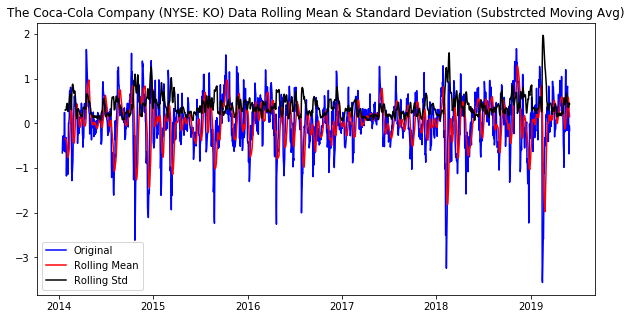

The Coca-Cola Company (NYSE: KO) Data Rolling Mean & Standard Deviation (Substrcted Moving Avg) Results of Dickey-Fuller Test:
Test Statistic                -1.178911e+01
p-value                        9.923615e-22
#Lags Used                     1.200000e+01
Number of Observations Used    1.952000e+03
Critical Value (1%)           -3.433704e+00
Critical Value (5%)           -2.863022e+00
Critical Value (10%)          -2.567559e+00
dtype: float64


In [11]:
# Substract moving average 
moving_avg = price.rolling(12).mean()
no_trend = price - moving_avg
# plt.plot(no_trend)
# plt.title("The Coca-Cola Company (KO) Data with Rolling Mean Subtracted")
test_stationarity(no_trend.dropna(),"The Coca-Cola Company (NYSE: KO) Data Rolling Mean & Standard Deviation (Substrcted Moving Avg)")


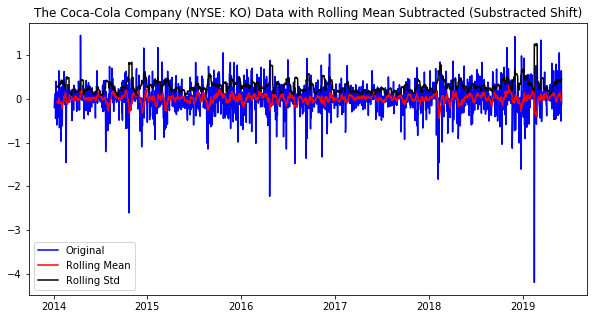

The Coca-Cola Company (NYSE: KO) Data with Rolling Mean Subtracted (Substracted Shift) Results of Dickey-Fuller Test:
Test Statistic                  -32.214142
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1973.000000
Critical Value (1%)              -3.433669
Critical Value (5%)              -2.863006
Critical Value (10%)             -2.567550
dtype: float64


In [12]:
# substract shift
diff=price-price.shift()
diff.dropna(inplace=True)
# fig = plt.figure(figsize = (10,5))
# plt.plot(diff)
# plt.title("The Coca-Cola Company (KO) Data with Rolling Mean Subtracted")

test_stationarity(diff,"The Coca-Cola Company (NYSE: KO) Data with Rolling Mean Subtracted (Substracted Shift)")

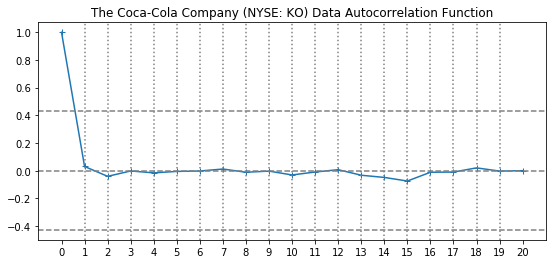

In [13]:
acf_stock = acf(diff.dropna(), nlags=20)
#Plot ACF: 
plt.figure(figsize=(20, 4))

plt.subplot(121) 
plt.plot(acf_stock,marker='+')
plt.xticks(np.arange(21))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(acf_stock)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(acf_stock)),linestyle='--',color='gray')
for i in range(1,20):
    plt.axvline(x=i,linestyle=':',color='gray')
plt.title('The Coca-Cola Company (NYSE: KO) Data Autocorrelation Function')
plt.savefig("KO_acf.png", ext='png', bbox_inches="tight")
plt.show()
plt.close()

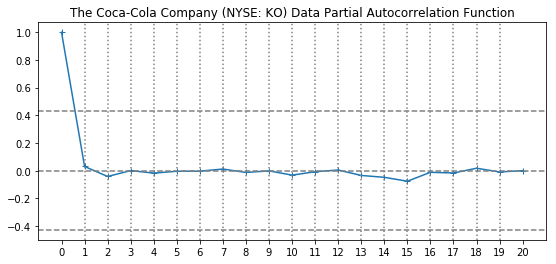

In [14]:
pacf_stock = pacf(diff.dropna(), nlags=20)
#Plot ACF: 
plt.figure(figsize=(20, 4))

plt.subplot(121) 
plt.plot(pacf_stock,marker='+')
plt.xticks(np.arange(21))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(pacf_stock)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(pacf_stock)),linestyle='--',color='gray')
for i in range(1,20):
    plt.axvline(x=i,linestyle=':',color='gray')
plt.title('The Coca-Cola Company (NYSE: KO) Data Partial Autocorrelation Function')
plt.savefig("KO_pacf.png", ext='png', bbox_inches="tight")
plt.show()
plt.close()

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1975
Model:                     ARMA(1, 0)   Log Likelihood                -596.074
Method:                       css-mle   S.D. of innovations              0.327
Date:                Mon, 01 Jul 2019   AIC                           1198.147
Time:                        20:09:45   BIC                           1214.912
Sample:                    01-04-2014   HQIC                          1204.307
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0043      0.008      0.564      0.573      -0.011       0.019
ar.L1.Close     0.0305      0.022      1.354      0.176      -0.014       0.075
                                    Roots       

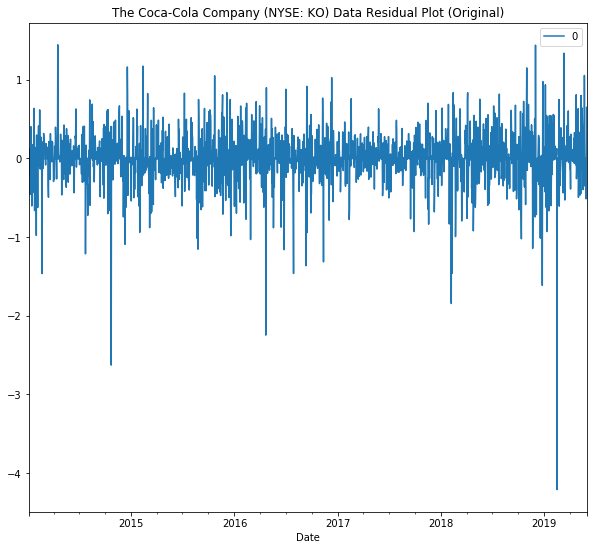

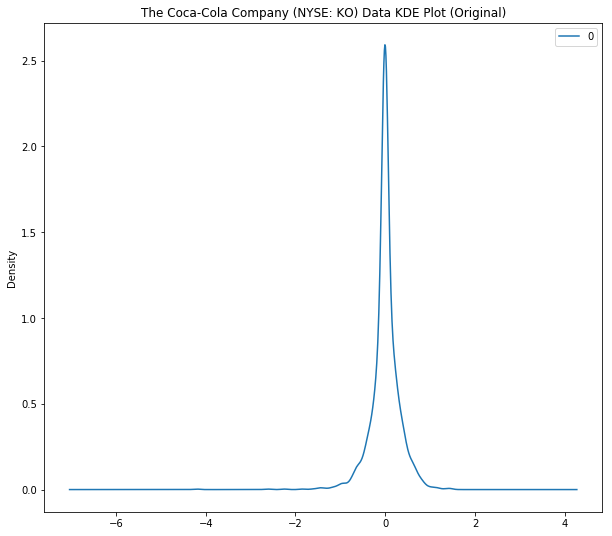

                 0
count  1975.000000
mean      0.000003
std       0.327301
min      -4.208113
25%      -0.089178
50%      -0.004153
75%       0.127473
max       1.442802


In [15]:
model = ARIMA(diff, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors

residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(10, 9))

plt.title('The Coca-Cola Company (NYSE: KO) Data Residual Plot (Original)')
plt.savefig("KO_residual_Initial.png", ext='png', bbox_inches="tight")
plt.show()
residuals.plot(kind='kde',figsize=(10, 9))
plt.title('The Coca-Cola Company (NYSE: KO) Data KDE Plot (Original)')
plt.savefig("KO_kde_Initial.png", ext='png', bbox_inches="tight")
plt.show()
print(residuals.describe())

14.548630404839026


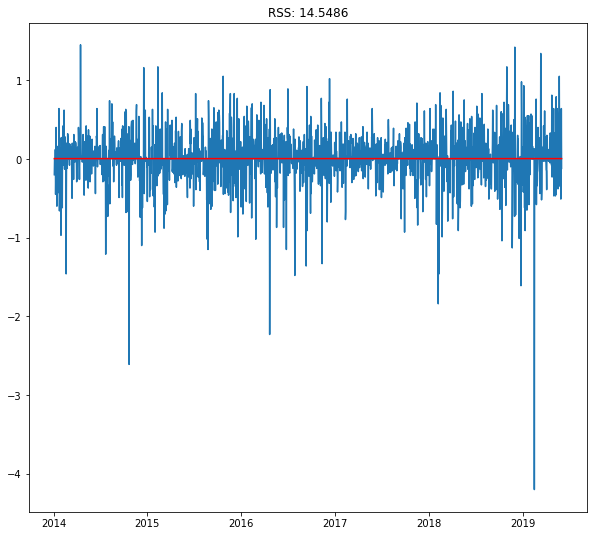

0 0 0
14.541269860508157


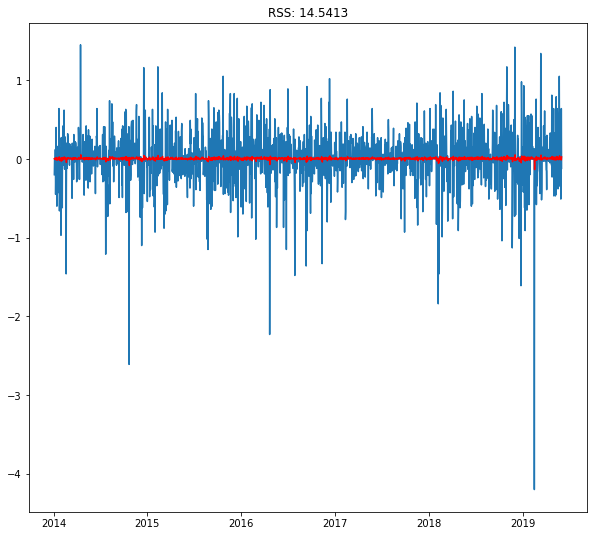

0 0 1
14.528767113596135


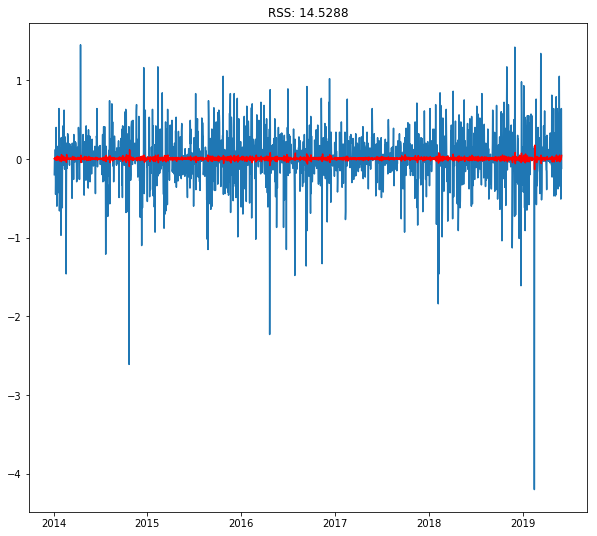

0 0 2


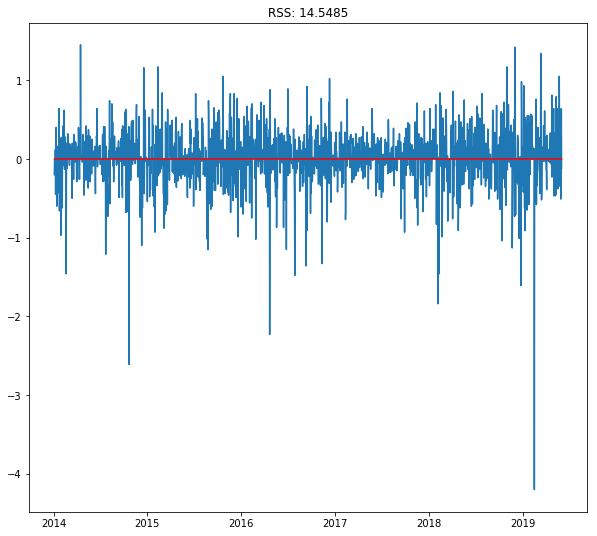

0 1 0


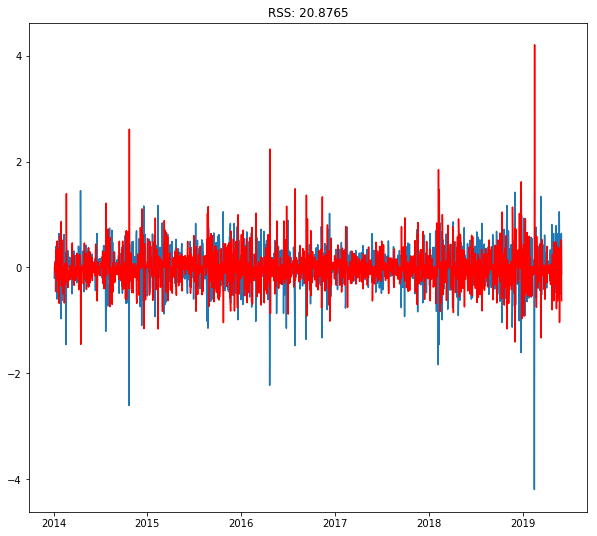

0 1 1


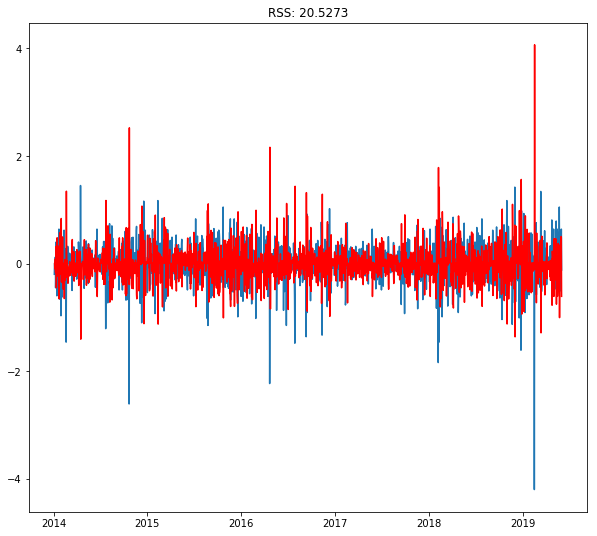

0 1 2


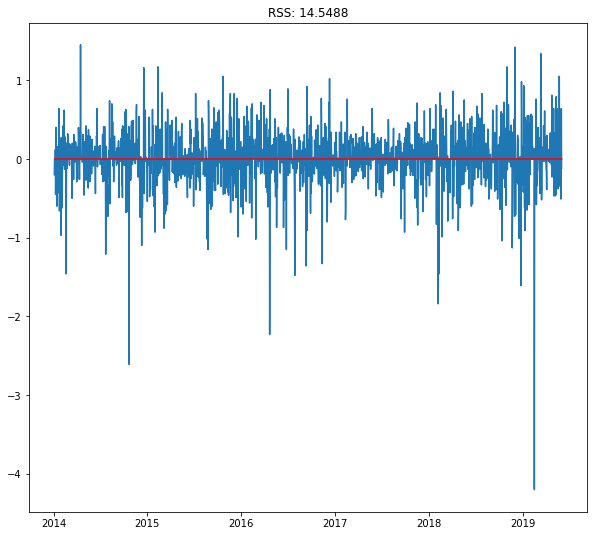

0 2 0


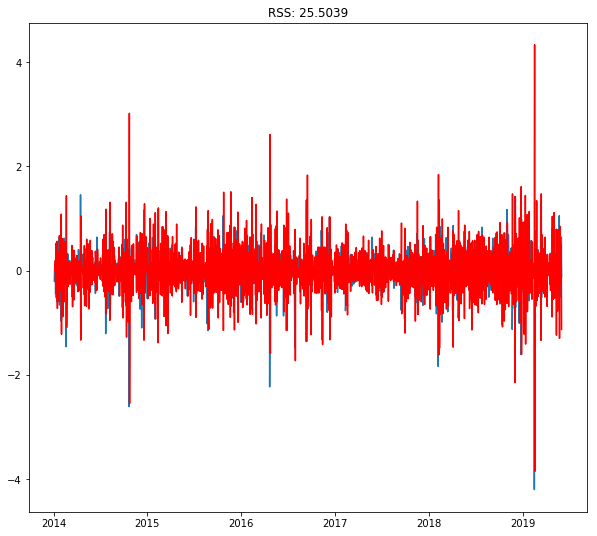

0 2 1


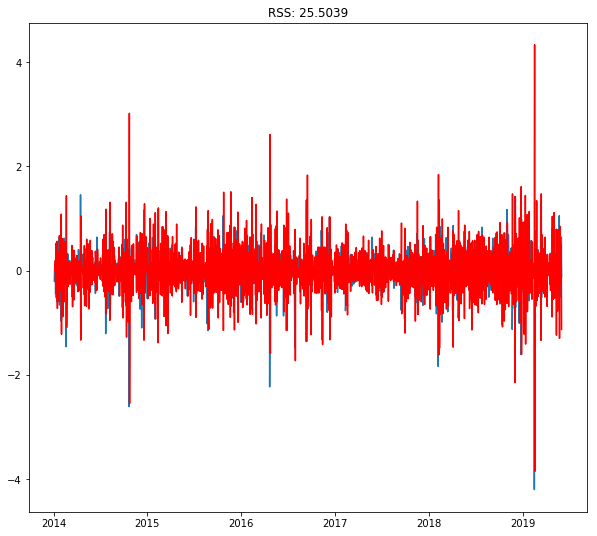

0 2 2


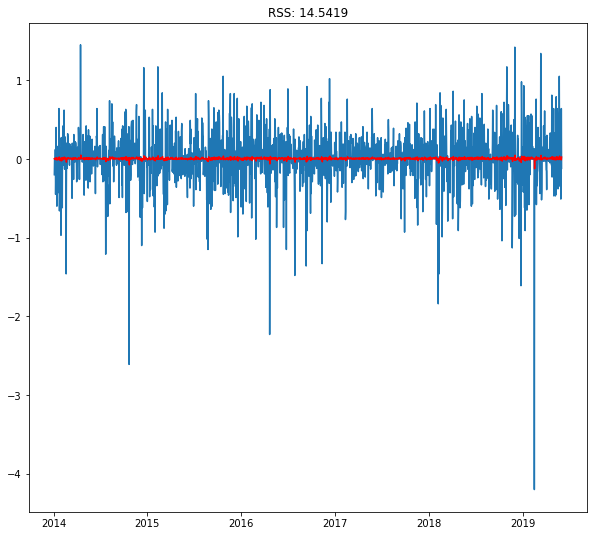

1 0 0


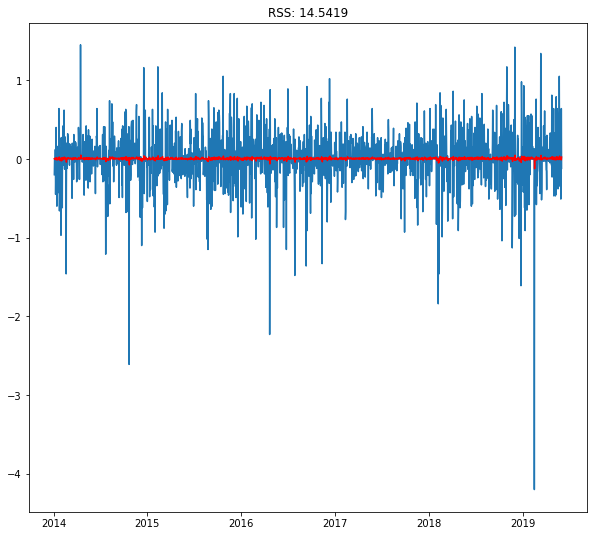

1 0 1
14.528726141660625


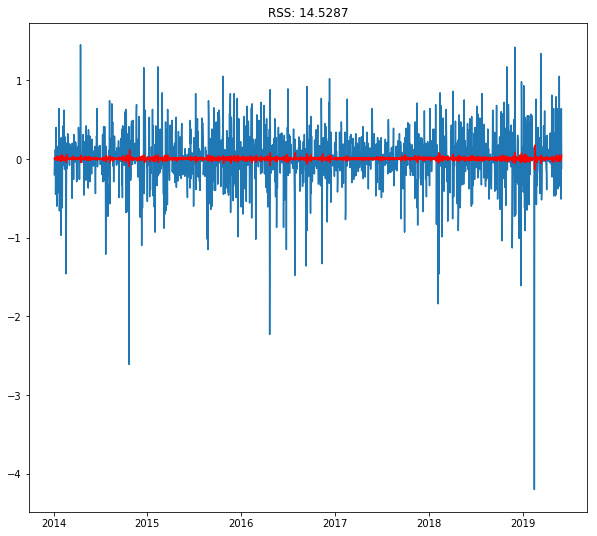

1 0 2


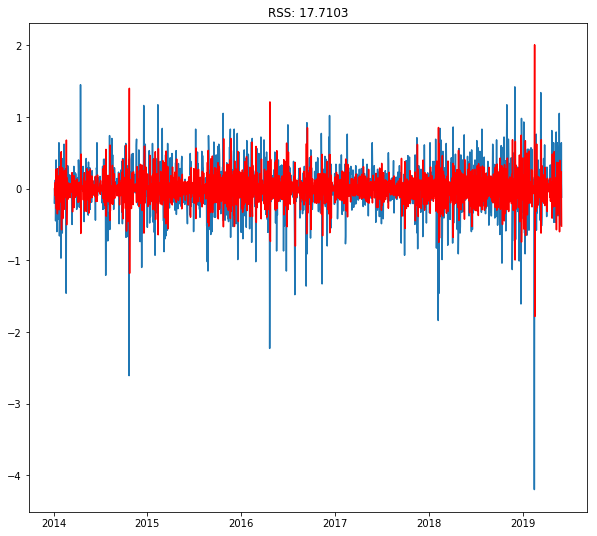

1 1 0


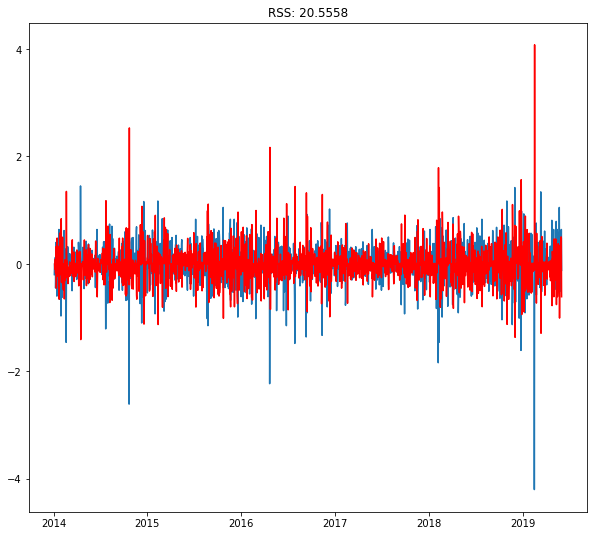

1 1 1


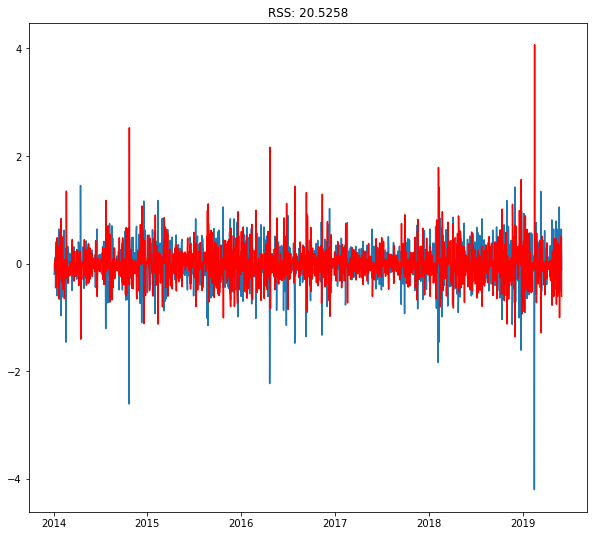

1 1 2


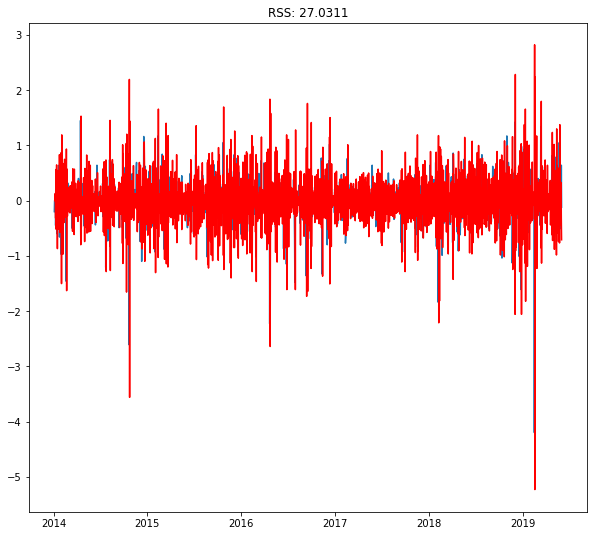

1 2 0


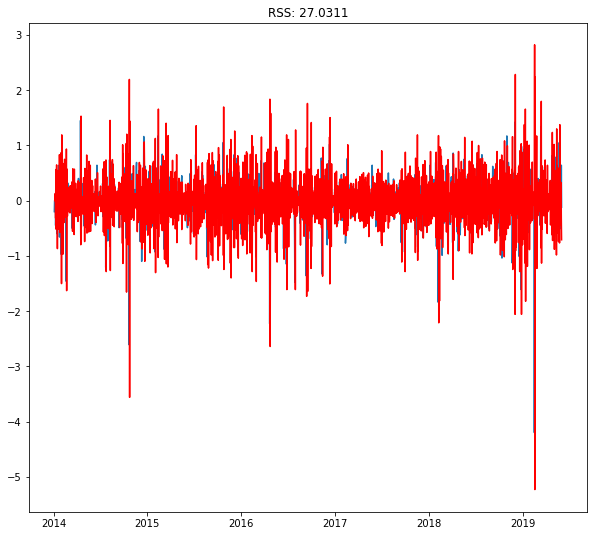

1 2 1


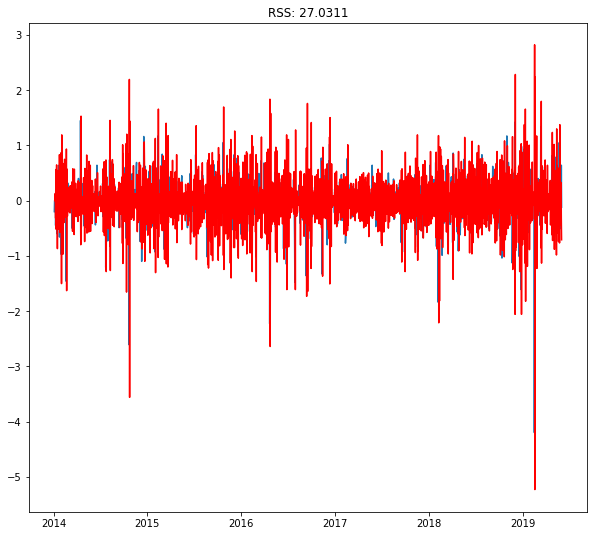

1 2 2


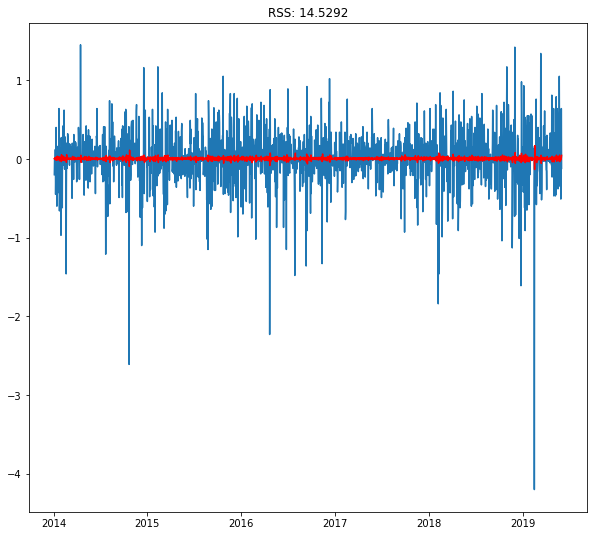

2 0 0


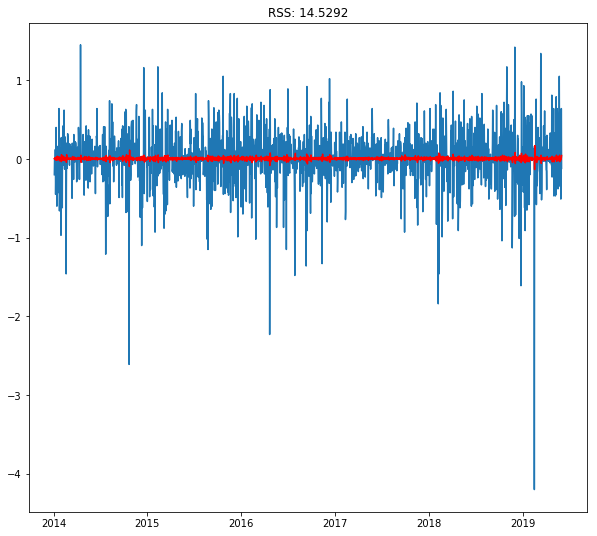

2 0 1
14.492053260292774


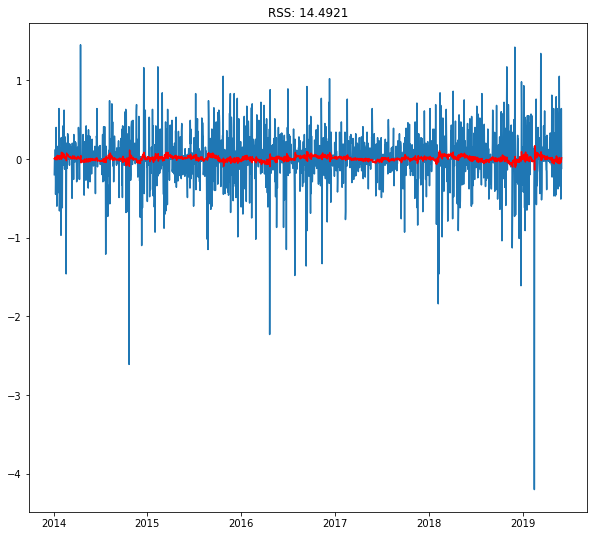

2 0 2


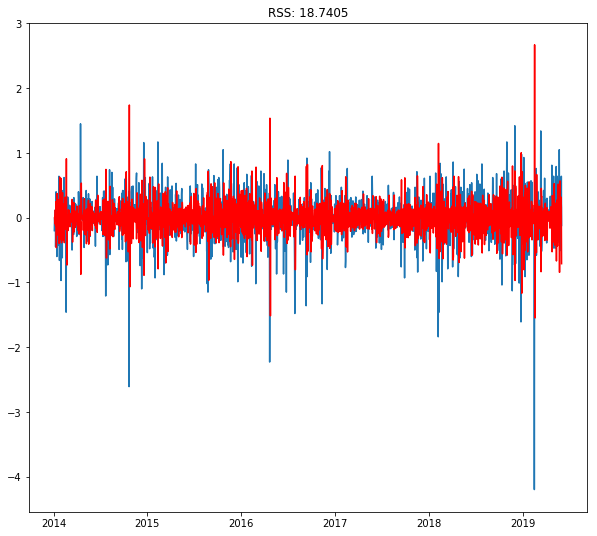

2 1 0


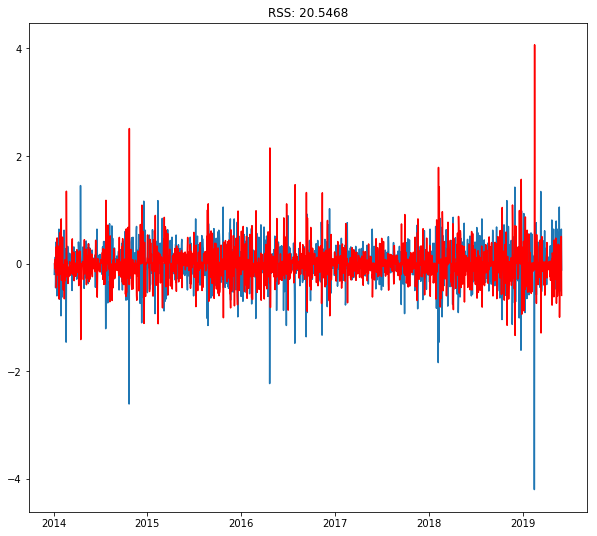

2 1 1


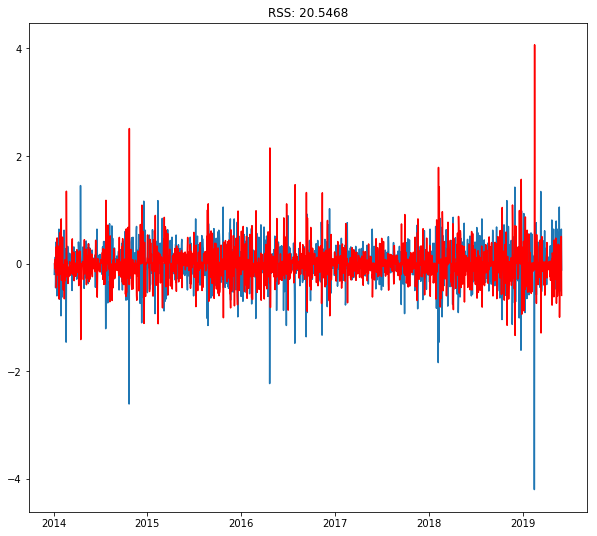

2 1 2


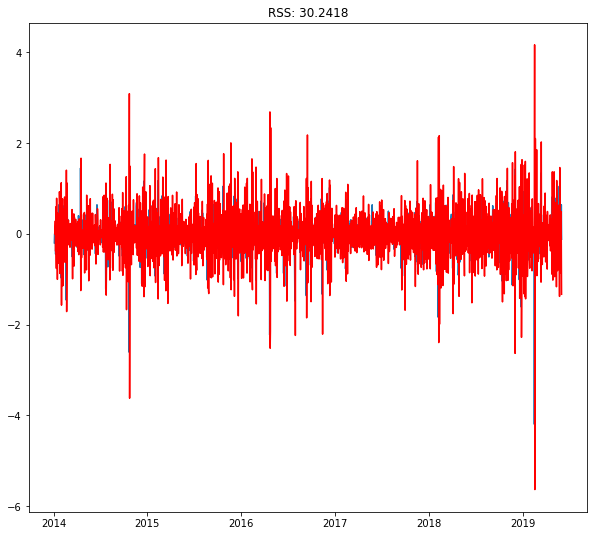

2 2 0


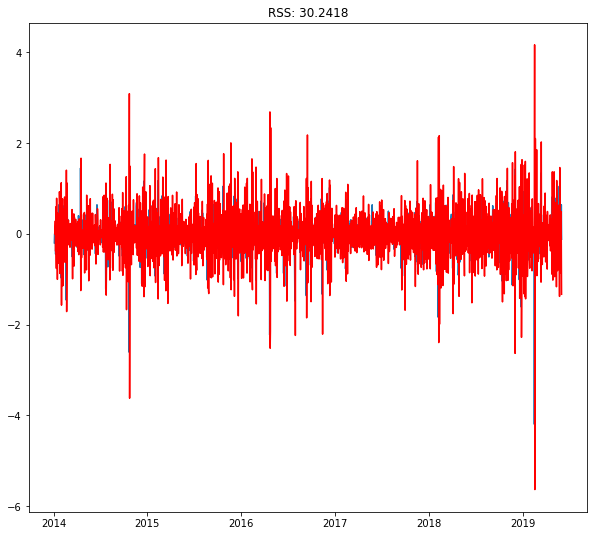

2 2 1


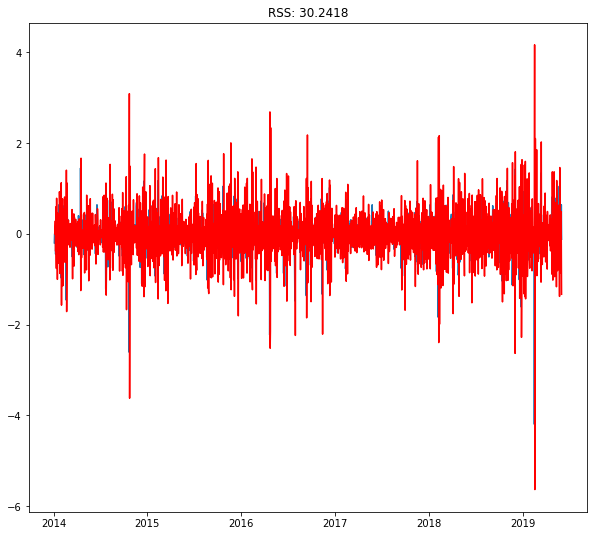

2 2 2


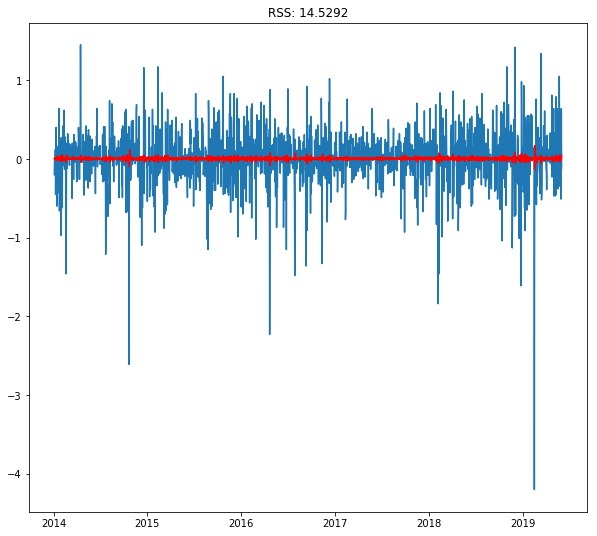

3 0 0


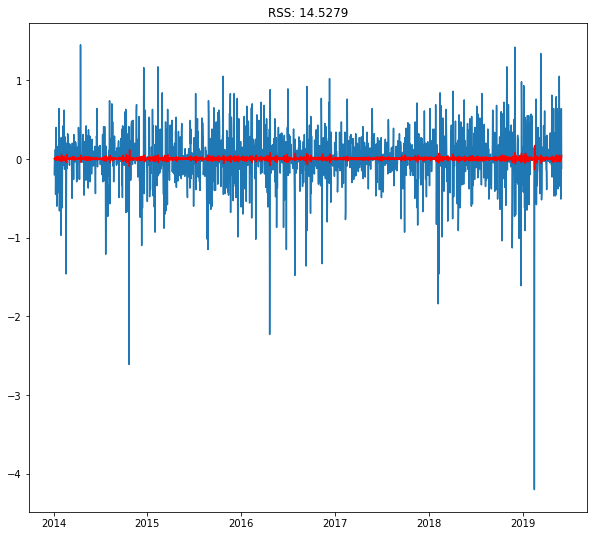

3 0 1
14.471634279713582


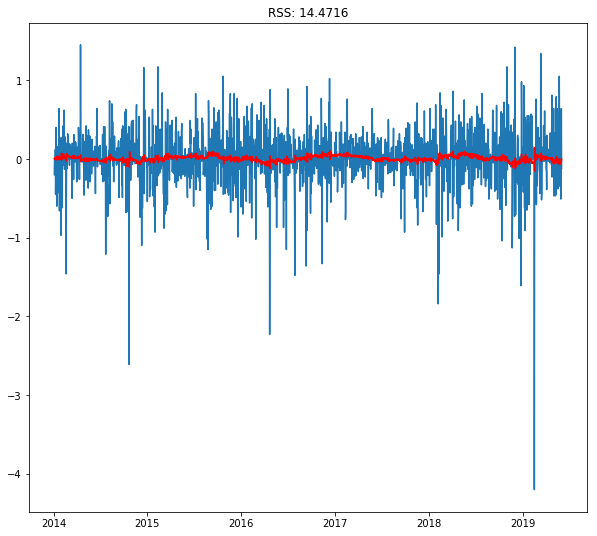

3 0 2


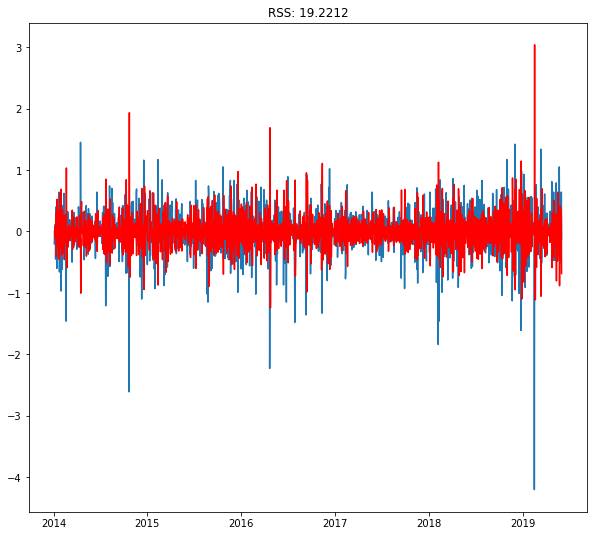

3 1 0


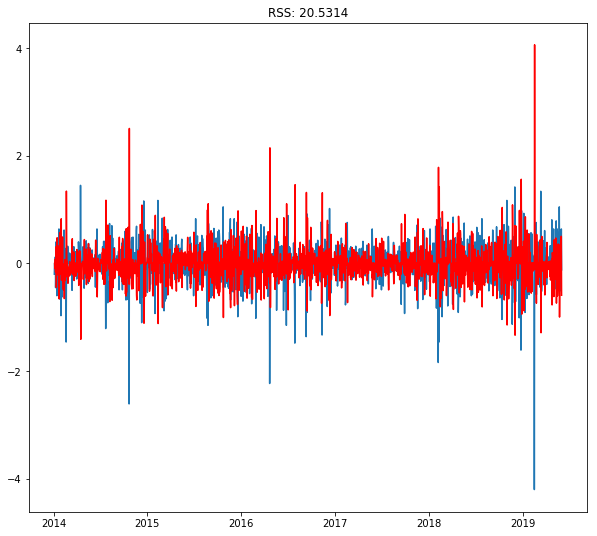

3 1 1


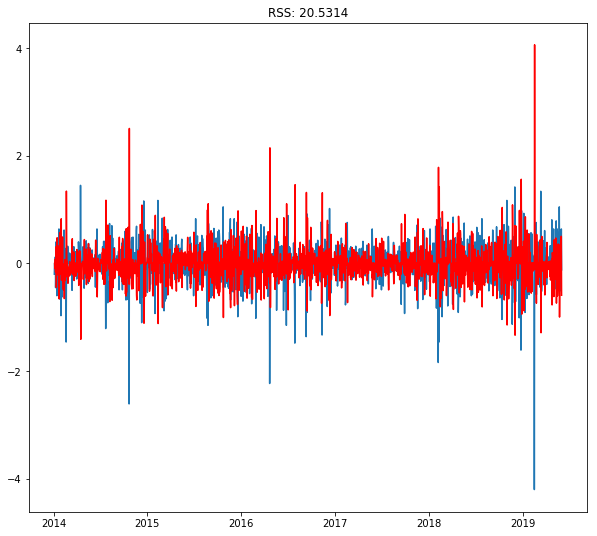

3 1 2


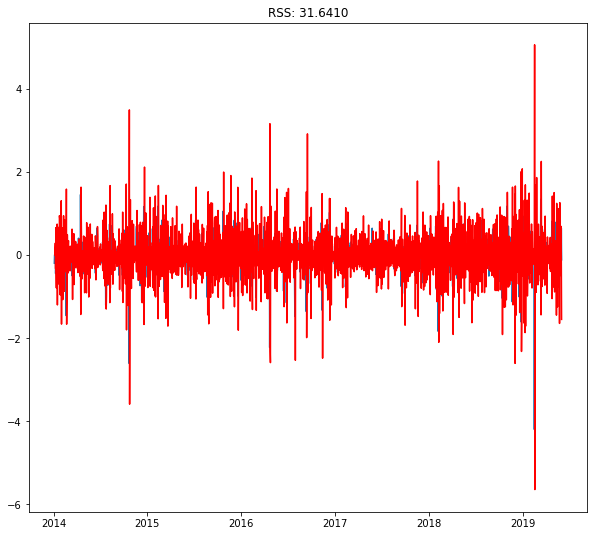

3 2 0


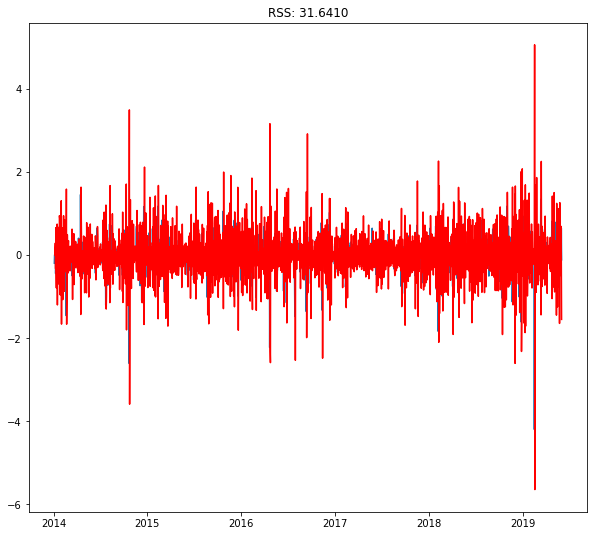

3 2 1


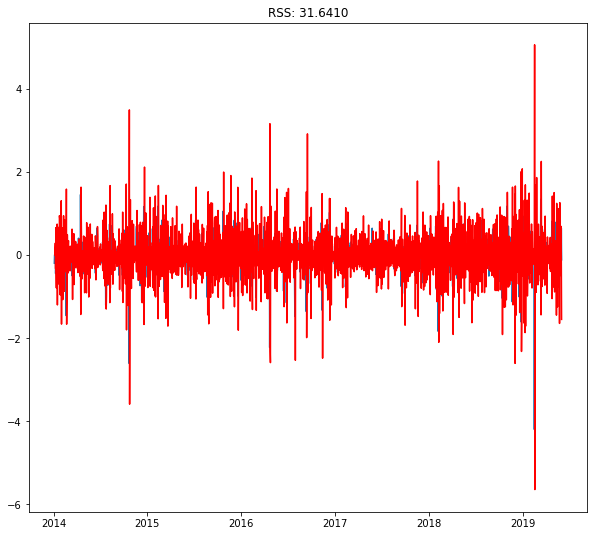

3 2 2


In [16]:
loss_best = 1E16
best_ints = [-1,-1,-1]
for p in range(4):
    for d in range(3):
        for q in range(3):
            model = ARIMA(diff, order=(p, d, q))  
            try:
                results_ARIMA = model.fit(disp=-1)
            except ValueError:
                pass
            except:
                pass
                        
            fig = plt.figure(figsize=(10,9))
            plt.plot(diff)
            plt.plot(results_ARIMA.fittedvalues, color='red')
            x=pd.DataFrame(results_ARIMA.fittedvalues)
            x=x.join(diff)
            x['out']=(x.iloc[:,0]-x.iloc[:,1])**2
            loss=np.sqrt(x['out'].sum())
            plt.title('RSS: %.4f'% loss)
            plt.savefig('KO_'+str(p)+'_'+str(d)+'_'+str(q), ext='png', bbox_inches="tight")
            if loss < loss_best:
                print(loss)
                loss_best = loss
                best_ints=[p,d,q]
            plt.show()
            print(p,d,q)

In [17]:
print(loss_best)
print(best_ints)

14.471634279713582
[3, 0, 2]


* Search for the 14.471634279713582 and find the best configuration is [3,0,2], however, based on rule 8, if there are multiple AR terms, MA term has to be 1 or 0. So, we choose [3,0,1] as our final model.


                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1975
Model:                     ARMA(3, 1)   Log Likelihood                -594.177
Method:                       css-mle   S.D. of innovations              0.327
Date:                Mon, 01 Jul 2019   AIC                           1200.353
Time:                        20:10:18   BIC                           1233.883
Sample:                    01-04-2014   HQIC                          1212.673
                         - 06-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0043      0.007      0.584      0.559      -0.010       0.019
ar.L1.Close    -0.7359      0.318     -2.316      0.021      -1.359      -0.113
ar.L2.Close    -0.0177      0.030     -0.594    

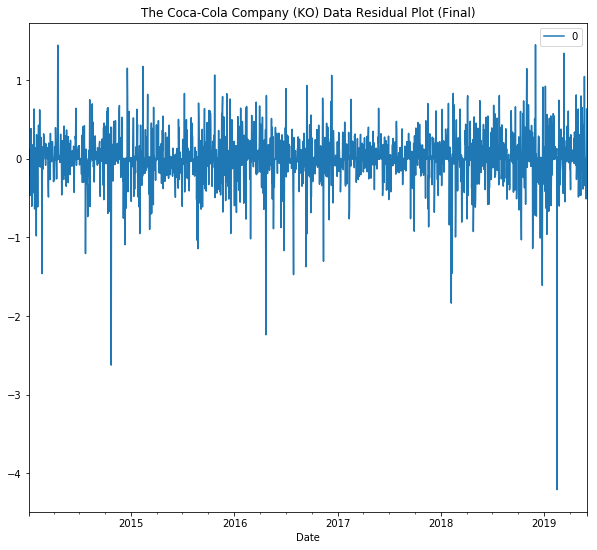

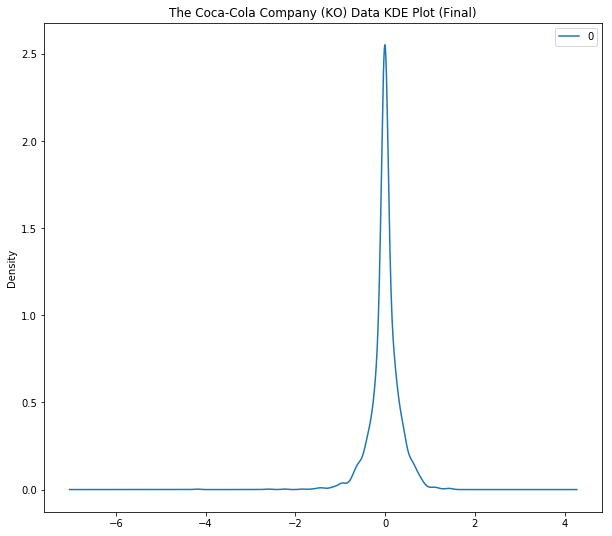

                 0
count  1975.000000
mean     -0.000001
std       0.326986
min      -4.207027
25%      -0.087207
50%      -0.001983
75%       0.131520
max       1.446631


In [18]:
# run the final model.

model = ARIMA(diff, order=(3,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors


residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(10, 9))
plt.title('The Coca-Cola Company (KO) Data Residual Plot (Final)')
plt.savefig("KO_residual_Final.png", ext='png', bbox_inches="tight")

plt.show()

residuals.plot(kind='kde',figsize=(10, 9))
plt.title('The Coca-Cola Company (KO) Data KDE Plot (Final)')
plt.savefig("KO_residual_kde_Final.png", ext='png', bbox_inches="tight")
plt.show()
print(residuals.describe())

## Prediction

In [19]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [20]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [21]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(price,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:20507.607755274432
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:17778.201483823064
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5966.810246504812
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5852.291626372996
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5968.618066115387
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5878.476709249642
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5878.153112222999
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5814.517966289612
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:17788.52408350628
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:15092.289636642625
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4193.223894975157
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3997.1781322929774
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4197.705148429215
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4013.2087229197514
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4054.256983811096
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3966.2993137781295
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1196.3414546501563
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1195.030481372497
ARI

* Best model ARIMA(0,1,1) x (1,0,0,12)

In [22]:
mod = sm.tsa.statespace.SARIMAX(price,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0346      0.021      1.670      0.095      -0.006       0.075
ar.S.L12       0.0090      0.024      0.372      0.710      -0.038       0.056
sigma2         0.1073      0.001    100.867      0.000       0.105       0.109


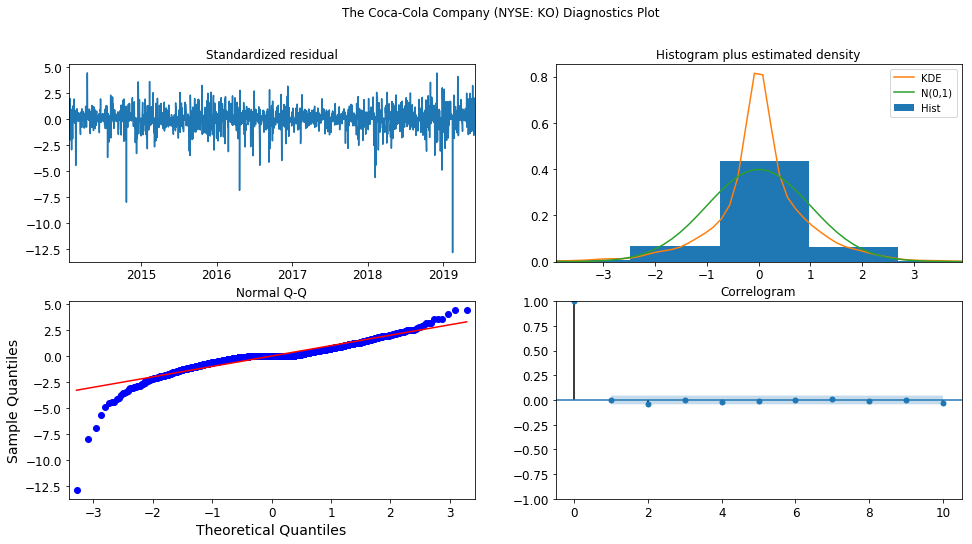

In [23]:
results.plot_diagnostics(figsize=(16, 8))
plt.suptitle('The Coca-Cola Company (NYSE: KO) Diagnostics Plot')
plt.savefig("KO_Diagnostics.png", ext='png', bbox_inches="tight")

plt.show()

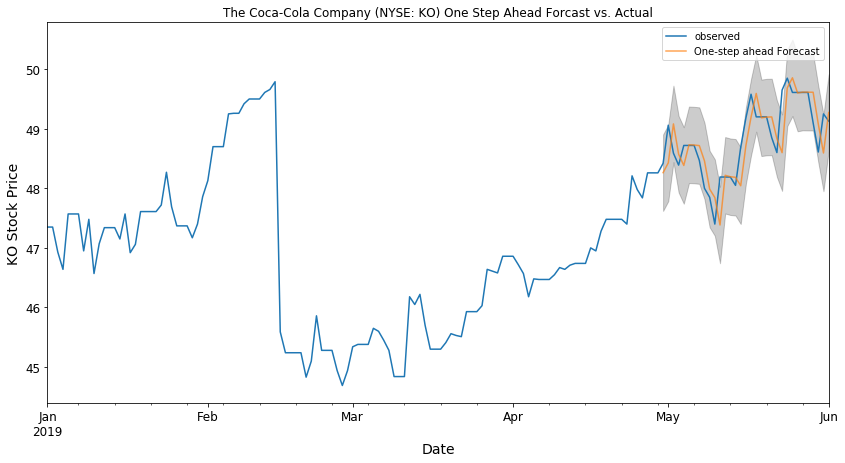

In [24]:
# VALIDATION
pred = results.get_prediction(start=pd.to_datetime('2019-04-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = price['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('KO Stock Price')
plt.legend()
plt.title('The Coca-Cola Company (NYSE: KO) One Step Ahead Forcast vs. Actual')
plt.savefig("KO_Forcast.png", ext='png', bbox_inches="tight")

plt.show()

In [25]:
y_forecasted = pred.predicted_mean
y_truth = price['2018-04-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 0.16
The Root Mean Squared Error of our forecasts is 0.4


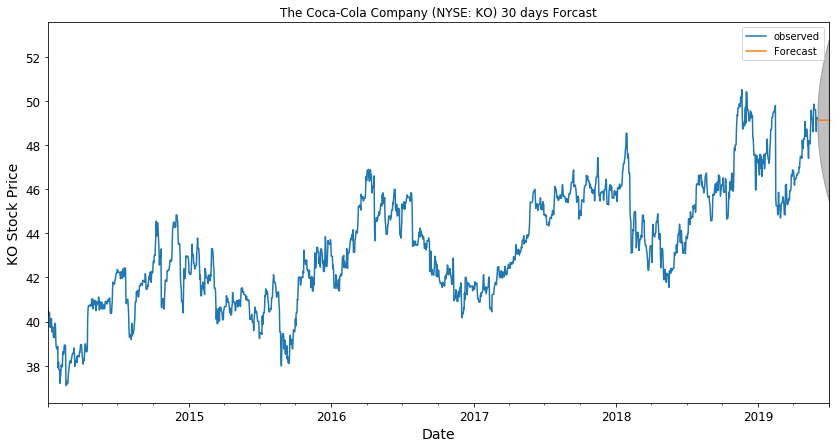

In [26]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = price.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('KO Stock Price')
plt.legend()
plt.title('The Coca-Cola Company (NYSE: KO) 30 days Forcast')
plt.savefig("KO_Forcast_30days.png", ext='png', bbox_inches="tight")

plt.show()


# End of Case Study